In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows: <br> <br>
Data Set Information: <br>
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the
following conditions:  <br> <br>

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) <br> <br>

Attribute Information: <br>
Listing of attributes: >50K, <=50K. <br>
age: continuous. <br>
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>
fnlwgt: continuous. <br>
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>
education-num: continuous. <br>
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>
sex: Female, Male. <br>
capital-gain: continuous. <br>
capital-loss: continuous. <br>
hours-per-week: continuous. <br>
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. <br> <br>

Following is the code to load required libraries and data: <br>
import numpy as np <br>
import pandas as pd <br> <br>

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None) <br>
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None) <br> <br>

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] <br>
train_set.columns = col_labels <br>
test_set.columns = col_labels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels
train_set['train'] = 1
test_set['train'] = 0

In [2]:
adult = pd.concat([train_set,test_set],axis=0)
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,train
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


In [3]:
adult.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,train
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.666660
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.471412
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
 15  train           48842 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


In [5]:
adult['wage_class'] = adult['wage_class'].str.replace('.','')
adult['wage_class'].value_counts()

 <=50K    37155
 >50K     11687
Name: wage_class, dtype: int64

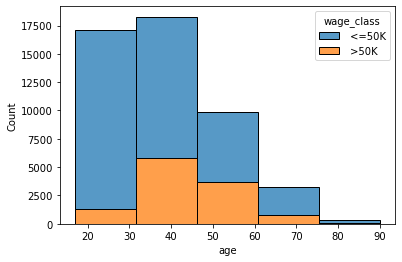

In [6]:
sns.histplot(data=adult,x='age',bins=5,hue='wage_class',multiple='stack');

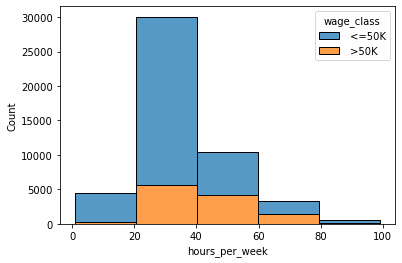

In [7]:
sns.histplot(data=adult,x='hours_per_week',bins=5,hue='wage_class',multiple='stack');

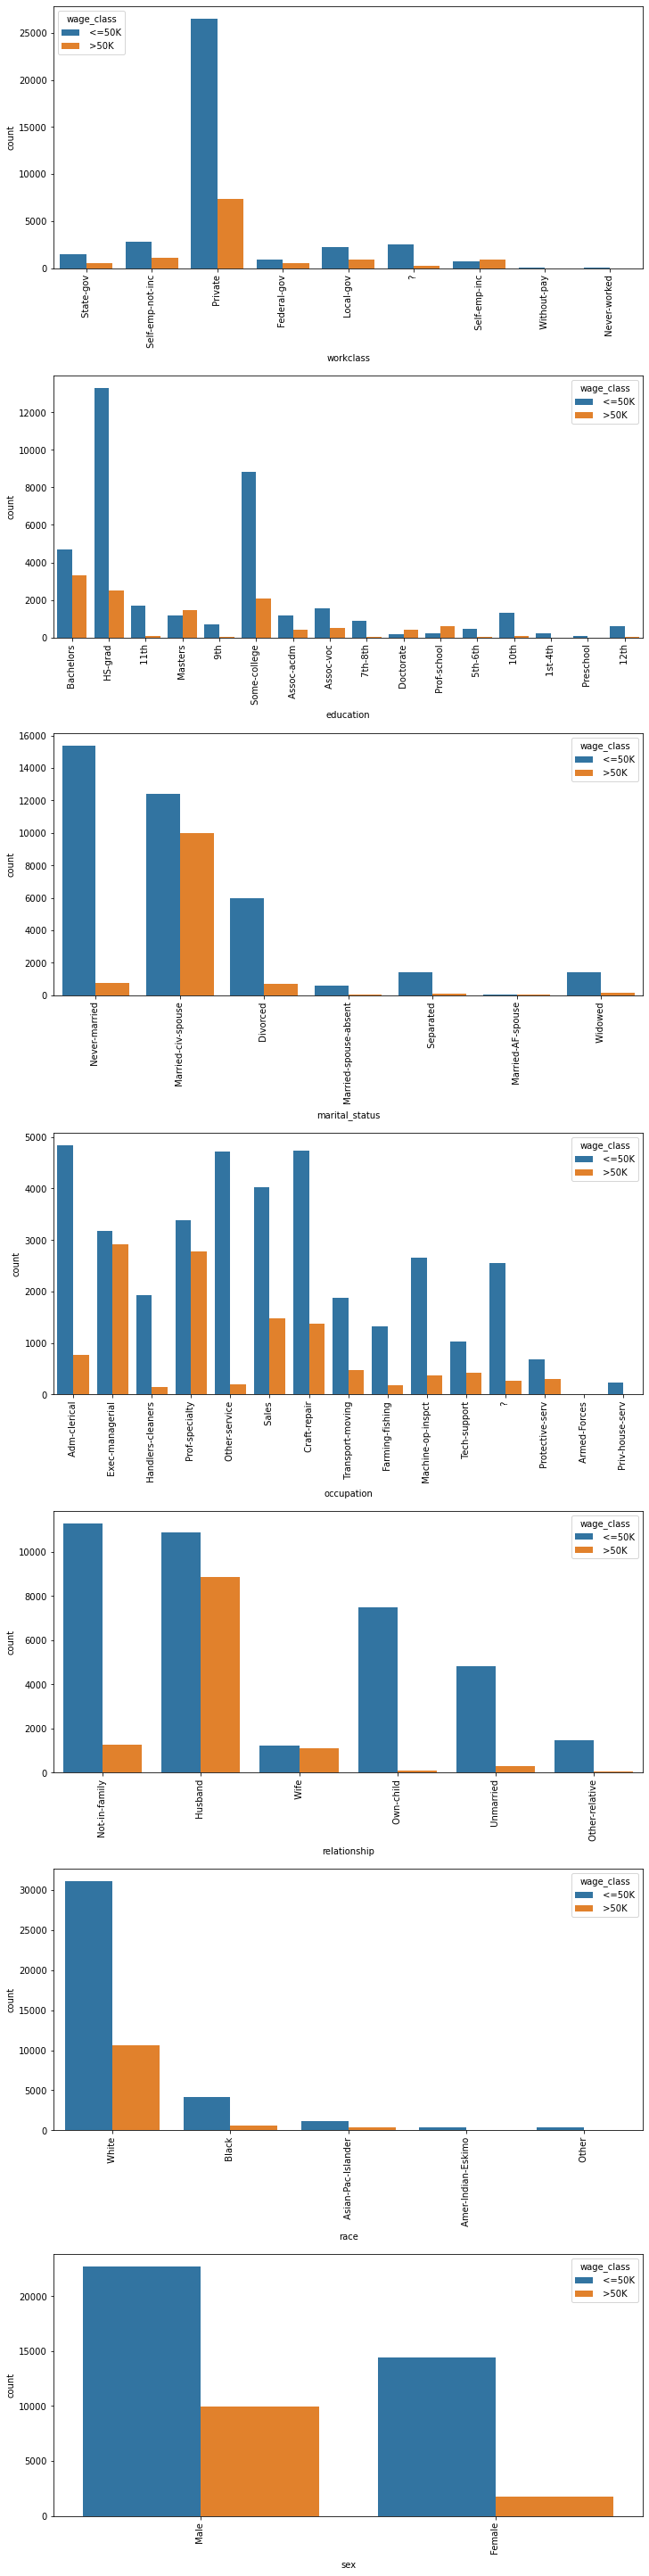

In [8]:
col = ['workclass','education','marital_status','occupation','relationship','race','sex']

fig, ax = plt.subplots(7,1,figsize=(10,40),constrained_layout=True)
a = 0

for a in range(0,7):
    c = col[a]
    g = sns.countplot(data=adult,x=adult[c],hue='wage_class',ax=ax[a])
    g.set_xticklabels(g.get_xticklabels(),rotation=90);

In [9]:
col = ['workclass','marital_status','occupation','relationship','race','native_country']

encoded = pd.get_dummies(adult,columns=col)
encoded.head()

,age,fnlwgt,education,education_num,sex,capital_gain,capital_loss,hours_per_week,wage_class,train,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,Bachelors,13,Male,2174,0,40,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,Male,0,0,13,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,HS-grad,9,Male,0,0,40,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,11th,7,Male,0,0,40,<=50K,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,Bachelors,13,Female,0,0,40,<=50K,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
gender = {' Male':1,' Female':0}
high_earning = {' <=50K':0,' >50K':1}
encoded['gender'] = encoded['sex'].map(gender)
encoded['high_earning'] = encoded['wage_class'].map(high_earning)
encoded.drop(columns=['education','sex','wage_class'],inplace=True)
encoded.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,train,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,gender,high_earning
0,39,77516,13,2174,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
encoded = encoded.astype(int)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

smote = SMOTE(sampling_strategy='minority',random_state=42)
train_data = encoded[encoded['train']==1]
train_data.drop(columns=['train'],inplace=True)
X = train_data.drop(columns=['high_earning'])
y = train_data['high_earning']
X_smote, y_smote = smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.3,random_state=42)

In [13]:
xgb = XGBClassifier(verbosity=0,max_depth=15,learning_rate=0.1,booster='gbtree',gamma=1,reg_alpha=0.5,reg_lambda=0.5,random_state=0,n_estimators=20)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8956984897518878


In [14]:
test_data = encoded[encoded['train']==0]
test_data.drop(columns=['train'],inplace=True)
X_new = test_data.drop(columns=['high_earning'])
y_new = test_data['high_earning']
y_pred_new = xgb.predict(X_new)
print(accuracy_score(y_new,y_pred_new))

0.8502548983477674
